In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [48]:
df=pd.read_csv("UTS_test.csv")
print(data_base)
print(df.columns)

     WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0       100     100     100     100     100     100     100     100     100   
1       100     100     100     100     100     100     100     100     100   
2       100     100     100     100     100     100     100     100     100   
3       100     100     100     100     100     100     100     100     100   
4       100     100     100     100     100     100     100     100     100   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
383     100     100     100     100     100     100     100     100     100   
384     100     100     100     100     100     100     100     100     100   
385     100     100     100     100     100     100     100     100     100   
386     100     100     100     100     100     100     100     100     100   
387     100     100     100     100     100     100     100     100     100   

     WAP010  ...  WAP587  WAP588  WAP589    Pos_x  

In [49]:
#veri setini inceliyoruz.
print(df.head())  
print(df.shape) 

   WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   
2     100     100     100     100     100     100     100     100     100   
3     100     100     100     100     100     100     100     100     100   
4     100     100     100     100     100     100     100     100     100   

   WAP010  ...  WAP587  WAP588  WAP589    Pos_x    Pos_y  Floor_ID  \
0     100  ...     100     100     100  25.7107  17.0455         8   
1     100  ...     100     100     100  28.2035  18.3964         8   
2     100  ...     100     100     100  30.9535  18.4768         8   
3     100  ...     100     100     100  34.4756  18.0586         8   
4     100  ...     100     100     100  37.4109  17.9622         8   

   Building_ID  User_ID  Phone_type            Time  
0       New IT     root      unknow  8/03/2019 6:47  
1       

In [53]:
#özellikleri ve hedef değişkenlerini tanımlıyoruz.


X = df[["WAP587", "WAP588", "WAP589"]]  # Kablosuz sinyal gücünün özellikleri
y = df[["Pos_x", "Pos_y"]]  # Konum koordinatlarımız  (hedef değişkenler)




In [54]:
# Eğitim ve test veri kümelerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
#K EN YAKIN KOMŞU MODELİNİ OLUŞTURMA
knn_model = KNeighborsRegressor(n_neighbors=3)


In [56]:
#modeli eğitiyoruz
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [57]:
#test verilerini kullanarak tahmin yapıyoruz
y_pred = knn_model.predict(X_test)

In [58]:
print("tahmin edilen sonuçlar:")
print(pd.DataFrame({"Pos_x":y_pred[:,0], "Pos_y": y_pred[:,1]}))

tahmin edilen sonuçlar:
        Pos_x      Pos_y
0   60.101500  19.874600
1   60.101500  19.874600
2   60.101500  19.874600
3   60.101500  19.874600
4   60.101500  19.874600
..        ...        ...
73  60.101500  19.874600
74  60.101500  19.874600
75  69.152100  15.991833
76  57.170967  11.782200
77  60.101500  19.874600

[78 rows x 2 columns]


In [59]:
#hata değerini hesaplıyoruz
mse = mean_squared_error(y_test, y_pred)
print("Ortalama Kare Hata (MSE):", mse)

Ortalama Kare Hata (MSE): 233.0319212223875


In [60]:
#Kabl00osu0z sinyal güçleri ve konumlarını ayırıp görseleştirme işlemini yapıcağız
X = df[['WAP587', 'WAP588', 'WAP589']]
y = df[['Pos_x', 'Pos_y']]


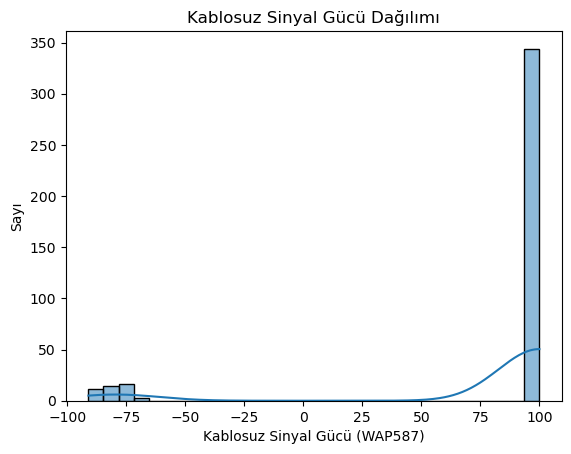

In [61]:
# Kablosuz sinyal gücü dağılımı
sns.histplot(data=df, x='WAP587', bins=30, kde=True)
plt.title('Kablosuz Sinyal Gücü Dağılımı')
plt.xlabel('Kablosuz Sinyal Gücü (WAP587)')
plt.ylabel('Sayı')
plt.show()

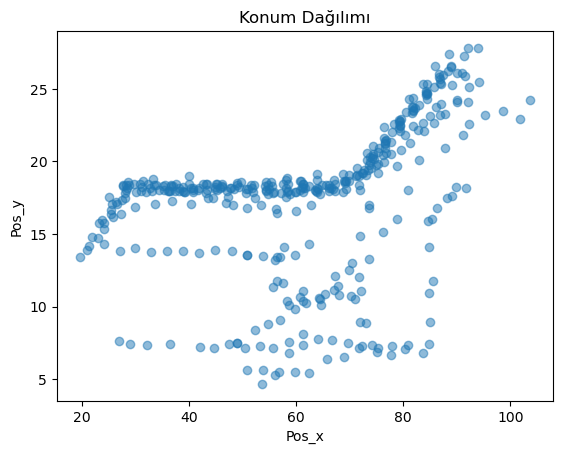

In [62]:
plt.scatter(df["Pos_x"], df["Pos_y"], alpha=0.5)
plt.title("Konum Dağılımı")
plt.xlabel("Pos_x")
plt.ylabel("Pos_y")
plt.show()

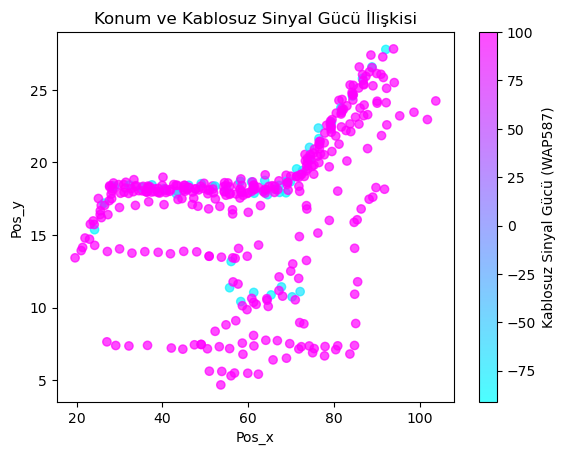

In [63]:
plt.scatter(df["Pos_x"], df["Pos_y"], c=df["WAP587"], cmap="cool", alpha=0.7)
plt.title("Konum ve Kablosuz Sinyal Gücü İlişkisi")
plt.xlabel("Pos_x")
plt.ylabel("Pos_y")
plt.colorbar(label="Kablosuz Sinyal Gücü (WAP587)")
plt.show()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# K-en yakın komşu modelimizi oluşturuyoruz.
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
#test verileri ile  tahmin yapıyoruz
y_pred = knn_model.predict(X_test)

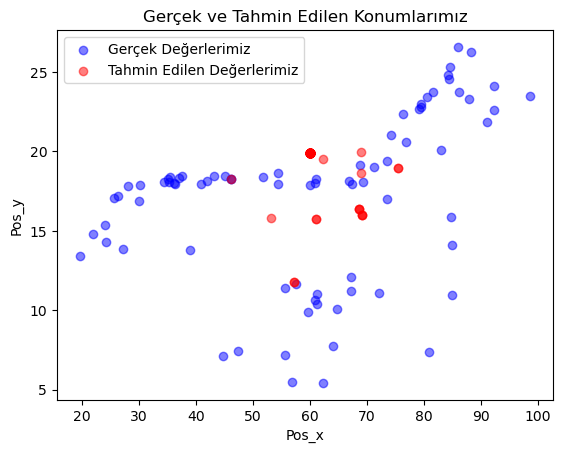

In [41]:
#Gerçek değerlerimiz ile tahmin edilen değerlerimizi karşılaştırıyoruz.
plt.scatter(y_test["Pos_x"], y_test["Pos_y"], c="blue", label="Gerçek Değerlerimiz", alpha=0.5)
plt.scatter(y_pred[:, 0], y_pred[:, 1], c="red", label="Tahmin Edilen Değerlerimiz", alpha=0.5)
plt.title("Gerçek ve Tahmin Edilen Konumlarımız")
plt.xlabel("Pos_x")
plt.ylabel("Pos_y")
plt.legend()
plt.show()


In [ ]:
#Hata dağılımları

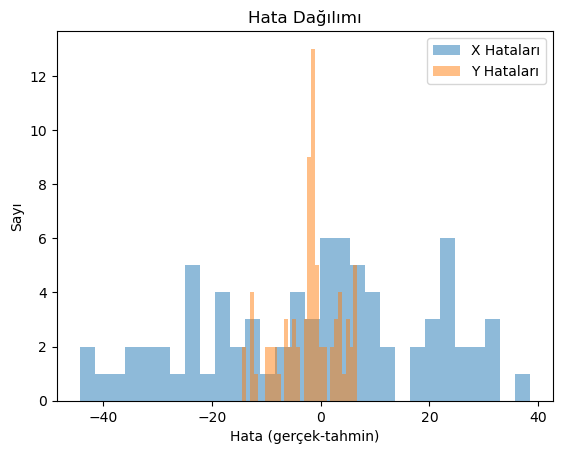

In [43]:
hata_x=y_test["Pos_x"]- y_pred[:,0]
hata_y=y_test["Pos_y"]- y_pred[:,1]

plt.hist(hata_x, bins=30, alpha=0.5, label="X Hataları")
plt.hist(hata_y, bins=30, alpha=0.5, label="Y Hataları")
plt.title("Hata Dağılımı")
plt.xlabel("Hata (gerçek-tahmin)")
plt.ylabel("Sayı")
plt.legend()
plt.show()



In [46]:
#Hata ölçümleri
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ortalama Kare Hata (MSE):", mse)
print("Ortalama Mutlak Hata (MAE):", mae)
print("R-Kare (R2):", r2)


Ortalama Kare Hata (MSE): 233.0319212223875
Ortalama Mutlak Hata (MAE): 10.773232692307694
R-Kare (R2): -0.0987023854131


In [ ]:

# ÖZET
# Çalışmamda kablosuz sinyal gücü ve konum bilgilerini içeren bir veri seti üzerinde bir konum tahminleme modeli oluşturdum.
# Veri seti, kablosuz sinyal gücü (WAP587, WAP588, WAP589) ve konum bilgileri (Pos_x, Pos_y) gibi özellikleri içeriyordu.
# Kablosuz sinyal gücü dağılımını histogram ve konum dağılımını saçılım grafiği ile inceledim.
# Aynı zamanda kablosuz sinyal gücü ile konum arasındaki ilişkiyi heatmap (ısı haritası) ile görselleştirdim.
# Veri Bölme: Veri setimizi eğitim ve test veri kümelerine böldüm.
# Eğitim veri kümesi modeli eğitmek için kullanıldı, test veri kümesi ise modelin performansını değerlendirmek için.
# K-En Yakın Komşuluk Regresyon modelini kullanarak kablosuz sinyal gücü verilerini kullanarak konum tahminleri yaptım.
# Modeli eğittik ve test veri kümesi üzerinde tahminler yaptım.
# Elde ettiğimiz tahminler ile gerçek konum değerlerini karşılaştırdık ve hata analizi yaptım. 
# Hata dağılımını histogram ile inceledik ve Ortalama Kare Hata (MSE), Ortalama Mutlak Hata (MAE) 
# ve R-Kare (R2) gibi ölçümler kullanarak modelin performansını değerlendirdim.




























